<a href="https://colab.research.google.com/github/nabillaclarissasalma/super-duper-tribble/blob/main/HR_Data_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Human Resources Data**

In [1]:
import numpy as np
import pandas as pd

In [19]:
import seaborn as sns
sns.set()

In [22]:
!pip install pywaffle
from pywaffle import Waffle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.1/25.1 MB 35.6 MB/s eta 0:00:00


In [24]:
pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import plotly.express as px

import matplotlib as mpl
from matplotlib.cm import ScalarMappable
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from textwrap import wrap

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving HRDataset_v14.csv to HRDataset_v14.csv


In [3]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['HRDataset_v14.csv']))
# Dataset is now stored in a Pandas Dataframe

In [4]:
df2.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [6]:
df2.shape

(311, 36)

In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [8]:
#Prints Data Statistik nilai numerik
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
EmpID,311.0,10156.000000,89.922189,10001.00,10078.50,10156.00,10233.5,10311.0
MarriedID,311.0,0.398714,0.490423,0.00,0.00,0.00,1.0,1.0
MaritalStatusID,311.0,0.810289,0.943239,0.00,0.00,1.00,1.0,4.0
GenderID,311.0,0.434084,0.496435,0.00,0.00,0.00,1.0,1.0
EmpStatusID,311.0,2.392283,1.794383,1.00,1.00,1.00,5.0,5.0
DeptID,311.0,4.610932,1.083487,1.00,5.00,5.00,5.0,6.0
PerfScoreID,311.0,2.977492,0.587072,1.00,3.00,3.00,3.0,4.0
FromDiversityJobFairID,311.0,0.093248,0.291248,0.00,0.00,0.00,0.0,1.0
Salary,311.0,69020.684887,25156.636930,45046.00,55501.50,62810.00,72036.0,250000.0
Termd,311.0,0.334405,0.472542,0.00,0.00,0.00,1.0,1.0


Mengisolasi kolom numerik dan kolom kategorikal:

In [10]:
ccol=df2.select_dtypes(include=["object"]).columns
ncol=df2.select_dtypes(include=["int","float"]).columns

In [11]:
print("The number of Categorical columns are:",len(ccol))
print("The number of Numerical columns are:",len(ncol))

The number of Categorical columns are: 18
The number of Numerical columns are: 18


In [12]:
ncol

Index(['EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID', 'EmpStatusID',
       'DeptID', 'PerfScoreID', 'FromDiversityJobFairID', 'Salary', 'Termd',
       'PositionID', 'Zip', 'ManagerID', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'DaysLateLast30', 'Absences'],
      dtype='object')

#DaysLateLast30----Berapa hari karyawan datang terlambat untuk bekerja dalam 30 hari terakhir

In [14]:
for i in ncol:
    print(i,"-",df2[i].nunique())

EmpID - 311
MarriedID - 2
MaritalStatusID - 5
GenderID - 2
EmpStatusID - 5
DeptID - 6
PerfScoreID - 4
FromDiversityJobFairID - 2
Salary - 308
Termd - 2
PositionID - 30
Zip - 158
ManagerID - 23
EngagementSurvey - 119
EmpSatisfaction - 5
SpecialProjectsCount - 9
DaysLateLast30 - 7
Absences - 20


In [15]:
ccol

Index(['Employee_Name', 'Position', 'State', 'DOB', 'Sex', 'MaritalDesc',
       'CitizenDesc', 'HispanicLatino', 'RaceDesc', 'DateofHire',
       'DateofTermination', 'TermReason', 'EmploymentStatus', 'Department',
       'ManagerName', 'RecruitmentSource', 'PerformanceScore',
       'LastPerformanceReview_Date'],
      dtype='object')

In [16]:
for i in ccol:
    print(i,"-",df2[i].nunique())

Employee_Name - 311
Position - 32
State - 28
DOB - 307
Sex - 2
MaritalDesc - 5
CitizenDesc - 3
HispanicLatino - 4
RaceDesc - 6
DateofHire - 101
DateofTermination - 96
TermReason - 18
EmploymentStatus - 3
Department - 6
ManagerName - 21
RecruitmentSource - 9
PerformanceScore - 4
LastPerformanceReview_Date - 137


Data Visualization

1. Jumlah pegawai di setiap posisi. (Memungkinkan untuk memeriksa lowongan pada suatu posisi)

In [17]:
df2["Position"]

0       Production Technician I
1                       Sr. DBA
2      Production Technician II
3       Production Technician I
4       Production Technician I
                 ...           
306    Production Technician II
307     Production Technician I
308                         CIO
309                Data Analyst
310     Production Technician I
Name: Position, Length: 311, dtype: object

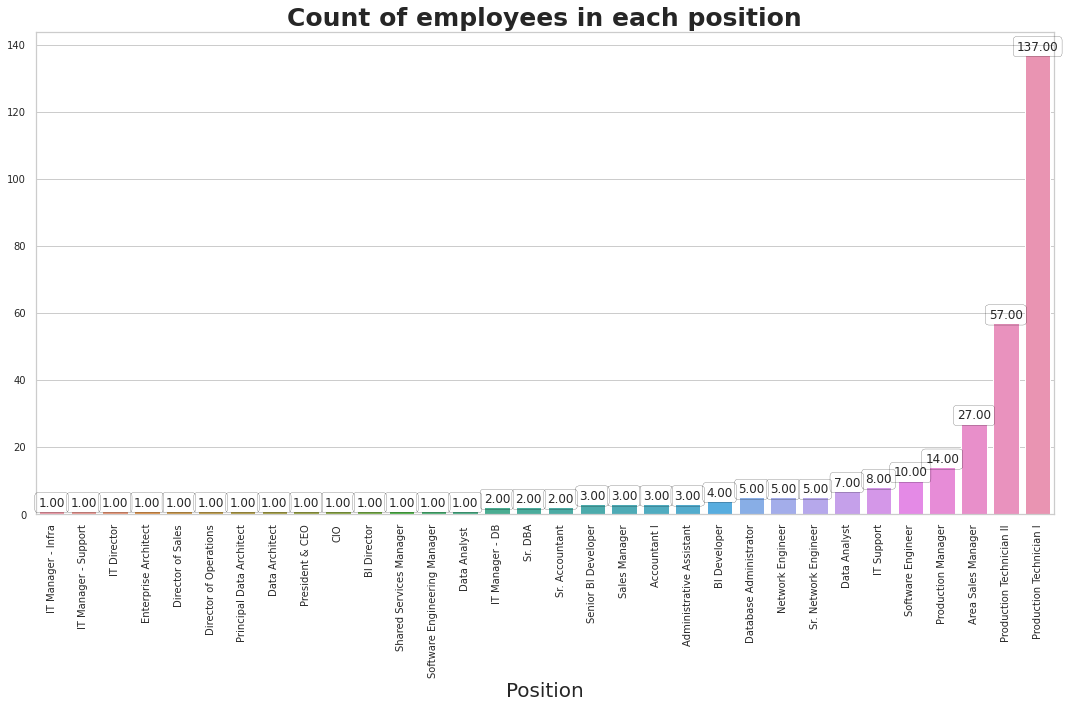

In [26]:
t=(df2.groupby("Position")["EmpID"].count()).sort_values(ascending =True)
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,10))
plots=sns.barplot(x=t.index,y=t.values)
# Iterrating over the bars one-by-one
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points',
                   bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.2))
    
plt.xticks(rotation=90) #Rotating the Label
plt.title("Count of employees in each position",size=25,weight="bold") #Title of the plot
plt.xlabel("Position",fontsize=20) #Title of x-axis
plt.tick_params(labelsize=10) #Varying label size
plt.tight_layout()

Sepertinya perusahaan lebih memilih latar belakang "Production Technician" saat mempekerjakan karyawan.

2. Jumlah karyawan di setiap negara bagian.

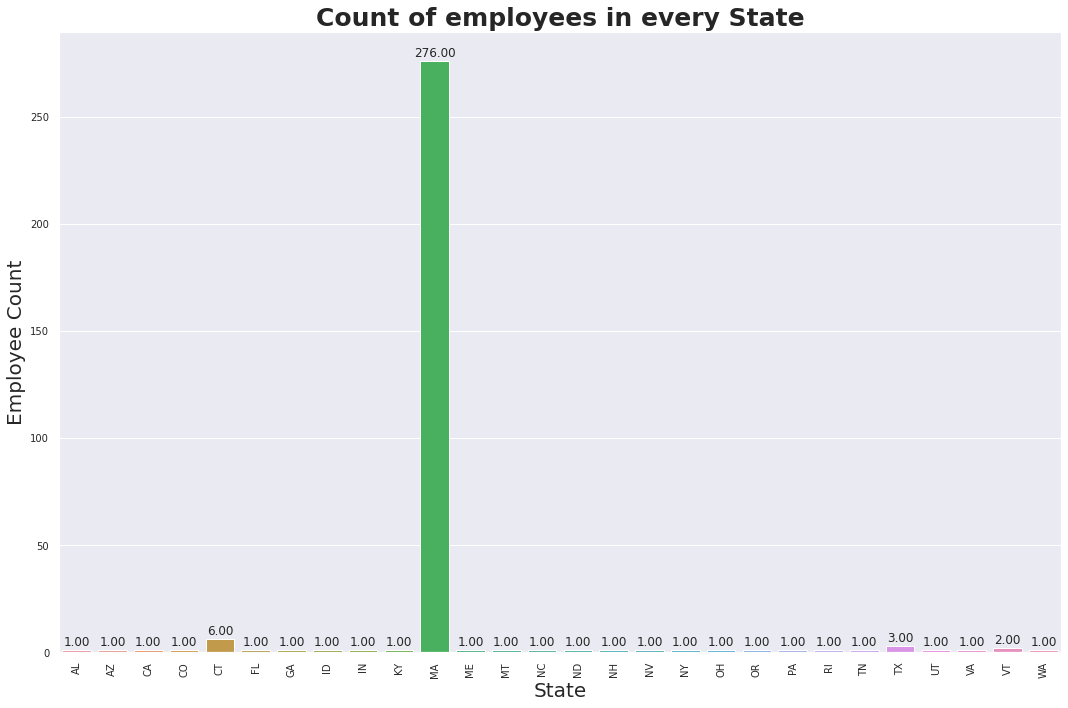

In [28]:
z=df2.groupby("State")["EmpID"].count()
sns.set_theme(style="darkgrid")
plt.figure(figsize=(15,10))
plots=sns.barplot(x=z.index,y=z.values)
# Iterrating over the bars one-by-one
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.xticks(rotation=90) #Rotating the Label
plt.title("Count of employees in every State",size=25,weight="bold") #Title of the plot
plt.xlabel("State",fontsize=20) #Title of x-axis
plt.ylabel("Employee Count",fontsize=20)
plt.tick_params(labelsize=10) #Varying label size
plt.tight_layout()

MASSACHUSETTS memiliki jumlah karyawan yang lebih tinggi. Mungkin menyarankan bahwa perusahaan didasarkan pada keadaan ini.

In [29]:
y=df2[["EmpID","Department","State"]].groupby(["State","Department"])["EmpID"].count()

In [30]:
table = pd.pivot_table(df2, values='EmpID', index=['State', 'Department'],aggfunc=lambda x: len(x.unique()))
table.rename({"EmpID":"Count of Employees"},axis=1,inplace=True)
table

Count of Employees
State Department                              
AL    Sales                                  1
AZ    Sales                                  1
CA    Sales                                  1
CO    Sales                                  1
CT    IT/IS                                  5
      Sales                                  1
FL    Sales                                  1
GA    Sales                                  1
ID    Sales                                  1
IN    Sales                                  1
KY    Sales                                  1
MA    Admin Offices                          9
      Executive Office                       1
      IT/IS                                 44
      Production                           209
      Sales                                  2
      Software Engineering                  11
ME    Sales                                  1
MT    Sales                                  1
NC    Sales                                  1
ND    Sales                                  1
NH    Sales                                  1
NV    Sales                                  1
NY    Sales                                  1
OH    Sales                                  1
OR    Sales                                  1
PA    Sales                                  1
RI    Sales                                  1
TN    Sales                                  1
TX    IT/IS                                  1
      Sales                                  2
UT    Sales                                  1
VA    Sales                                  1
VT    Sales                                  2
WA    Sales                                  1

Seperti yang terlihat dari tabel di atas, satu-satunya negara bagian yang menangani Produksi adalah Massachusetts. Istirahat semua negara bagian lain tidak memiliki unit produksi. Jadi jika Anda dipekerjakan sebagai Teknisi Produksi, Anda akan menuju ke Massachusetts untuk pekerjaan Anda.

Distribusi di Massachusetts:

In [31]:
table.reset_index(drop=False,inplace=True)

In [32]:
t=table[table["State"]=="MA"].reset_index()
t.sort_values(by=["Count of Employees"],ascending=False,inplace=True)
t["Department"]=t["Department"].apply(lambda x:x.strip())

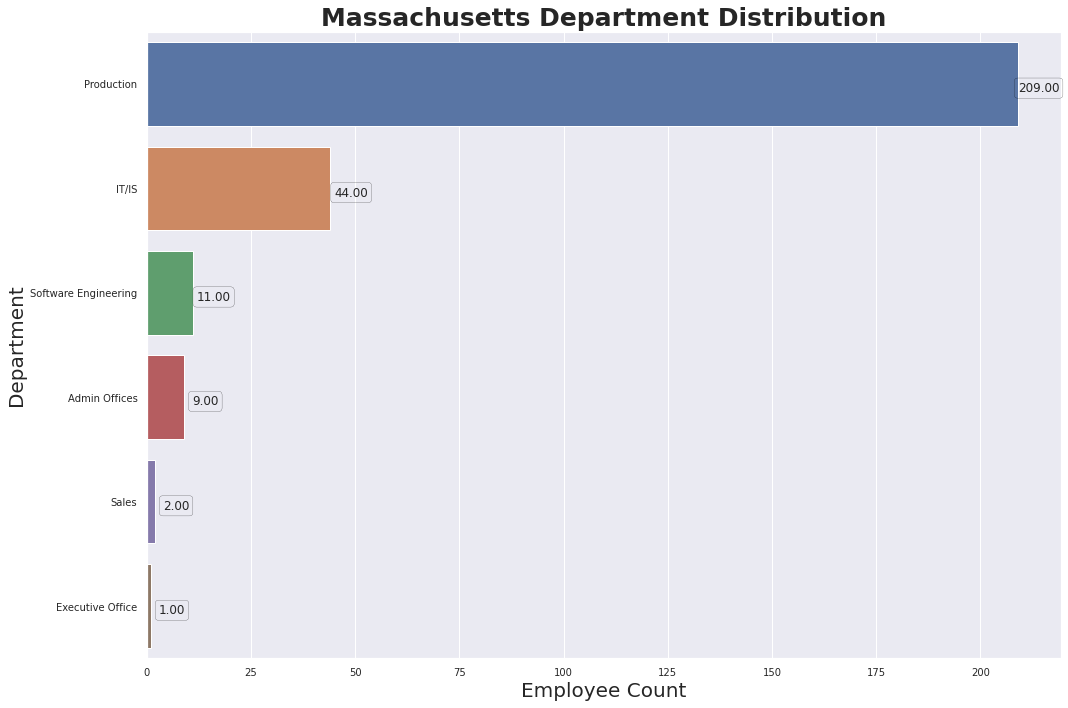

In [33]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(15,10))
plots=sns.barplot(x=t["Count of Employees"],y=t["Department"])
for p in plots.patches:
    width = p.get_width()
    plt.text(5+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='center', va='center',
             bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.2))

plt.yticks(rotation=0) #Rotating the Label
plt.title("Massachusetts Department Distribution",size=25,weight="bold") #Title of the plot
plt.xlabel("Employee Count",fontsize=20) #Title of x-axis
plt.ylabel("Department",fontsize=20)
plt.tick_params(labelsize=10) #Varying label size
plt.tight_layout()

3. Rasio Gender Wanita-Laki-Laki di dalam perusahaan.

In [35]:
x=df2.groupby("Sex")["EmpID"].count()/df2["EmpID"].count()
x

Sex
F     0.565916
M     0.434084
Name: EmpID, dtype: float64

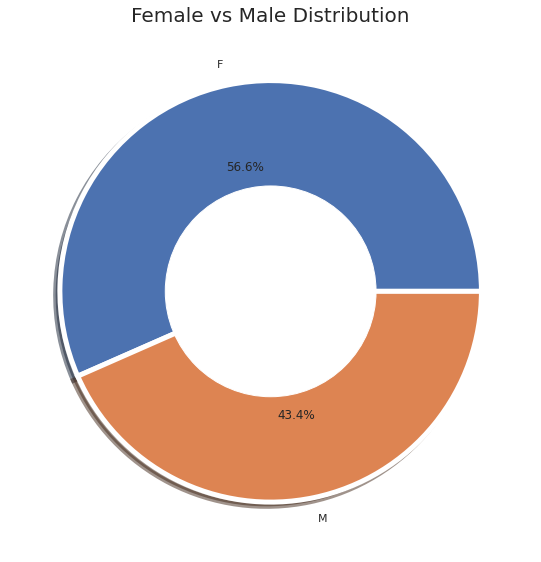

In [36]:
plt.figure(figsize=(8,8))
# Create a Donut Chart
plt.pie(x,labels=x.index,wedgeprops = { 'linewidth' : 5, 'edgecolor' : 'white' },autopct='%2.1f%%',shadow=True)
plt.rc("font",size=13)
# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title("Female vs Male Distribution",size=20,loc="center")

plt.tight_layout()

Jumlah karyawan Wanita lebih banyak daripada Pria. (56,6% hingga 43,4%)

4. Hitungan karyawan di bawah masing-masing manajer

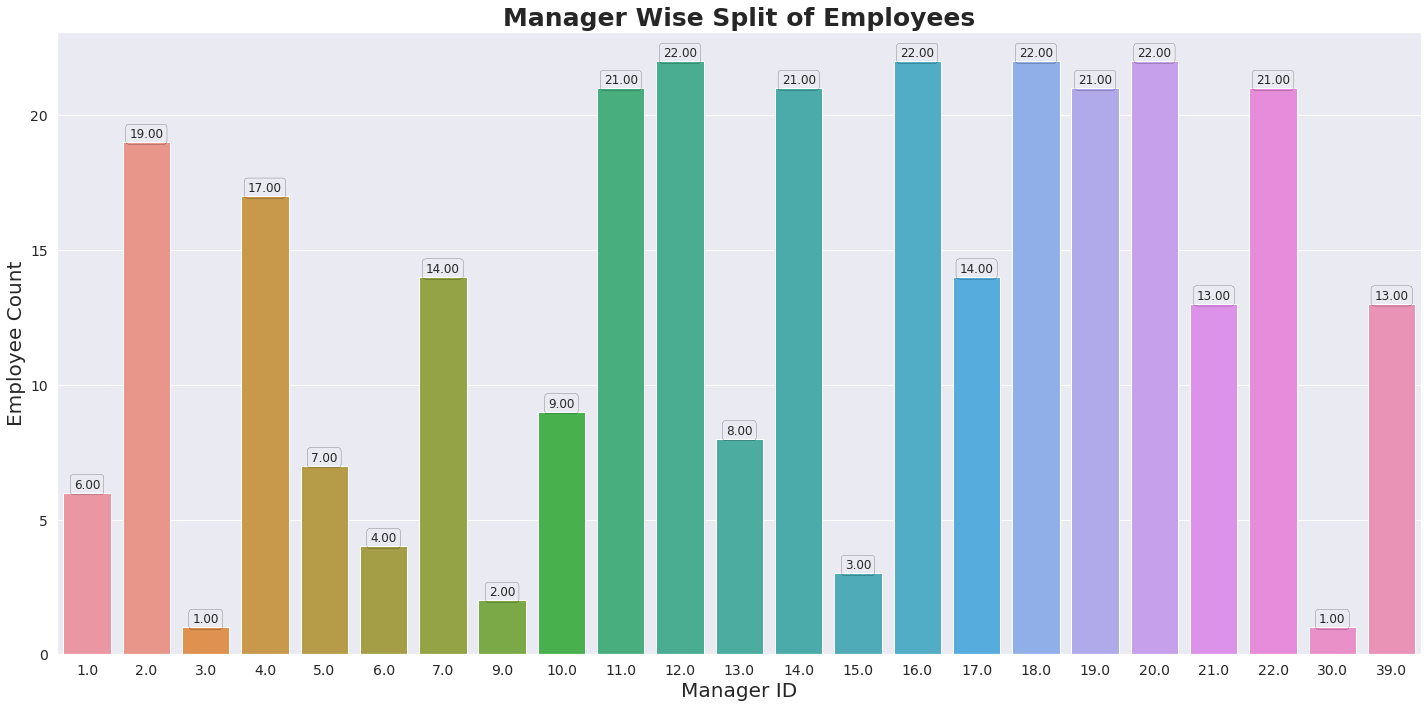

In [37]:
k=df2.groupby("ManagerID")["EmpID"].count()
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,10))
plots=sns.barplot(x=k.index,y=k.values,estimator=sum)
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points',
                   bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.2))
#plt.xticks(rotation=0) #Rotating the Label
plt.title("Manager Wise Split of Employees",size=25,weight="bold") #Title of the plot
plt.xlabel("Manager ID",fontsize=20) #Title of x-axis
plt.ylabel("Employee Count",fontsize=20)
plt.tick_params(labelsize=14) #Varying label size
plt.tight_layout()

Sepertinya Manajer dengan ID 3,9,15,30 memiliki jumlah karyawan yang bekerja di bawahnya lebih sedikit.

5. Hitungan bijaksana departemen karyawan.



In [38]:
j=df2.groupby("Department")["EmpID"].count().reset_index(drop=False)

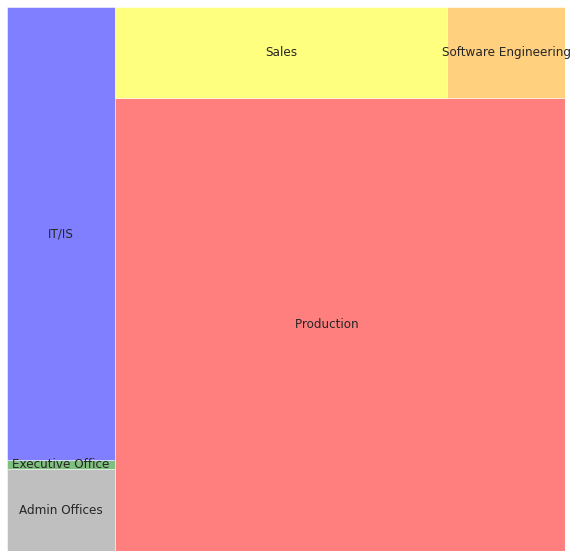

In [39]:
plt.figure(figsize=(10,10))
squarify.plot(sizes=j['EmpID'], label=j['Department'],color=["grey","green","blue", "red","yellow","orange","indigo"], alpha=.5)
plt.rc('font', size=8)          
plt.axis('off')
plt.show()

Mayoritas Karyawan milik Produksi perusahaan.

6. Distribusi Usia Karyawan.

In [40]:
df2["DOB"]

0      07/10/83
1      05/05/75
2      09/19/88
3      09/27/88
4      09/08/89
         ...   
306    05/11/85
307    05/04/82
308    08/30/79
309    02/24/79
310    08/17/78
Name: DOB, Length: 311, dtype: object

In [41]:
import datetime
from datetime import date,datetime
from dateutil.relativedelta import relativedelta

In [42]:
w=date.today()
w=w.strftime("%Y-%m-%d")

In [43]:
def days_between(d1, d2):
    d1 = datetime.strptime(d1, "%Y-%m-%d")
    d2 = datetime.strptime(d2, "%Y-%m-%d")
    return abs(relativedelta(d2, d1).years)

In [45]:
d=pd.to_datetime(df2["DOB"]).apply(lambda x:x.strftime("%Y-%m-%d"))
df2["Age"]=d.apply(lambda x:days_between(x, w))
df2["Age"]

0      39
1      47
2      34
3      34
4      33
       ..
306    37
307    40
308    43
309    43
310    44
Name: Age, Length: 311, dtype: int64

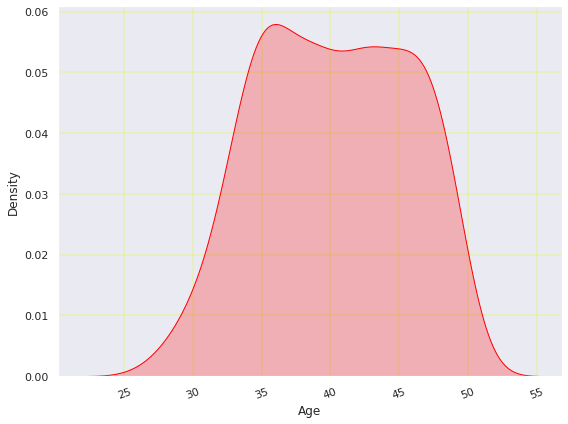

In [47]:
plt.figure(figsize=(8,6))
sns.set_theme(style="darkgrid")
plt.grid(True)
ax=sns.kdeplot(df2["Age"],shade=True,color="red")
ax.grid(which='major', axis='x', zorder=0, color='#DFFF00', linewidth=0.4)
ax.grid(which='major', axis='y', zorder=0, color='#DFFF00', linewidth=0.4)
plt.rc('font', size=10,weight="bold")
plt.xticks(rotation=20)
plt.tight_layout()

Mayoritas karyawan tampaknya berusia paruh baya, dengan 35 menjadi mode (Probabilitas penemuan lebih tinggi)

7. Probabilitas Distribusi Tarif Gaji di antara berbagai karyawan.



7.1 Distribusi Gaji berdasarkan jenis kelamin



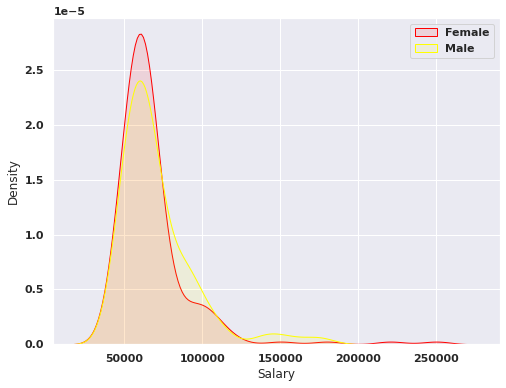

In [49]:
plt.figure(figsize=(8,6))
sns.set_theme(style="darkgrid")
sns.kdeplot(df2.loc[(df2["Sex"]=="F"),"Salary"],shade=True,color="red",label="Female",alpha=0.1)
sns.kdeplot(df2.loc[(df2["Sex"]=="M "),"Salary"],shade=True,color="yellow",label="Male",alpha=0.1) #shade=True
plt.legend()

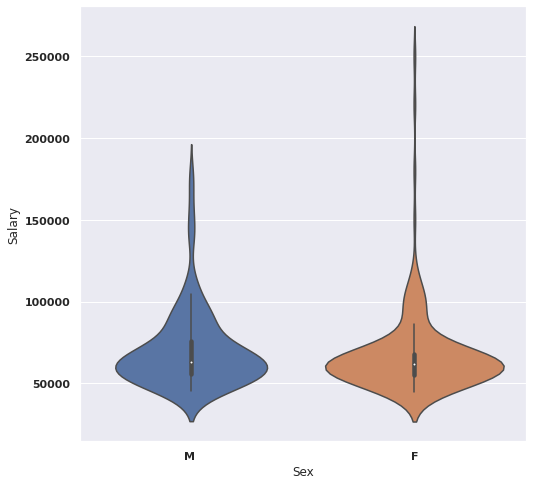

In [50]:
plt.figure(figsize=(8,8))
sns.violinplot(y=df2["Salary"], x=df2["Sex"])

In [51]:
df2.loc[(df2["Salary"]==df2["Salary"].max()),:]

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,Age
150,"King, Janet",10089,1,1,0,1,2,3,0,250000,...,9.0,Indeed,Fully Meets,4.83,3,0,1/17/2019,0,10,31


Seorang wanita bernama Janet King dibayar dengan gaji tertinggi di perusahaan.
Plot menunjukkan bahwa perempuan diberi pekerjaan bergaji tinggi dibandingkan dengan laki-laki.

8. Tingkat Pembayaran wrt Manager bekerja di bawah.

In [52]:
p=df2[["EmpID","ManagerID","Salary"]].copy().dropna()
p.head()

,EmpID,ManagerID,Salary
0,10026,22.0,62506
1,10084,4.0,104437
2,10196,20.0,64955
3,10088,16.0,64991
4,10069,39.0,50825


In [53]:
#Perlu memeriksa apakah karyawan dengan gaji tinggi termasuk dalam kelas manajer tertentu
p=(p.groupby("ManagerID").agg({"EmpID":"count","Salary":"mean"})).sort_values(by="Salary")
p.rename({"EmpID":"Count of Employees"},axis=1,inplace=True)
p

,Count of Employees,Salary
ManagerID,,
39.0,13,56549.615385
19.0,21,56936.666667
14.0,21,56938.571429
20.0,22,57183.818182
11.0,21,57881.857143
1.0,6,57893.833333
22.0,21,58099.142857
18.0,22,58912.181818
12.0,22,60095.454545


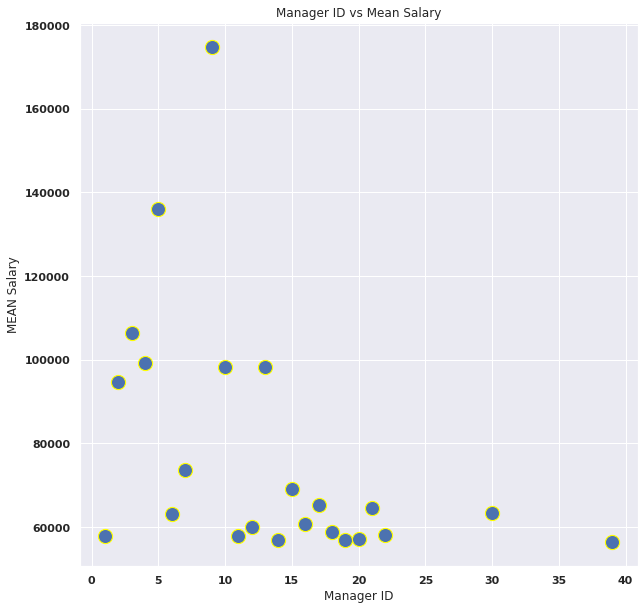

In [54]:
plt.figure(figsize=(10,10))
sns.set_style("darkgrid")
sns.scatterplot(p.index, p.Salary,s=200,edgecolor="yellow")  #c=p.index, cmap='viridis',edgecolor="yellow", linewidth=1
 
# Add titles (main and on axis)
plt.xlabel("Manager ID")
plt.ylabel("MEAN Salary")
plt.title("Manager ID vs Mean Salary")

# Show the graph
plt.show()

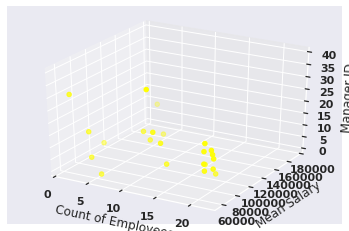

In [55]:
from mpl_toolkits.mplot3d import Axes3D

sns.set_style("darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = p['Count of Employees']
y = p['Salary']
z = p.index

ax.set_xlabel("Count of Employees")
ax.set_ylabel("Mean Salary")
ax.set_zlabel("Manager ID")

ax.scatter(x, y, z,c="yellow")

plt.show()

Karyawan dengan bayaran tertinggi bekerja di bawah Manajer dengan ID = 9

9. Skor Kinerja Manajer-bijaksana untuk memeriksa manajer mana yang memimpin tim yang lebih baik

a. Manager-Wise Split:

In [56]:
df2["PerformanceScore"] # PIP means Performance Improvement Plans-----meaning they are poorly performing.

0          Exceeds
1      Fully Meets
2      Fully Meets
3      Fully Meets
4      Fully Meets
          ...     
306    Fully Meets
307            PIP
308        Exceeds
309    Fully Meets
310    Fully Meets
Name: PerformanceScore, Length: 311, dtype: object

In [57]:
df2["PerformanceScore"].unique()

array(['Exceeds', 'Fully Meets', 'Needs Improvement', 'PIP'], dtype=object)

Rencana peningkatan kinerja juga disebut sebagai **PIP** (Performance Improvement Plans) dan nama alternatifnya adalah rencana tindakan kinerja. PIP adalah alat pengungkit SDM yang menguraikan langkah-langkah spesifik yang harus diambil karyawan untuk meningkatkan dan tujuan yang harus mereka capai.

I have assumed that the highest rating is 4 and the lowest rating is 1.
'Exceeds'------------------4

'Fully Meets'--------------3

'Needs Improvement'--------2

'PIP'----------------------1(Very Poor)

In [58]:
dic=dict(zip(df2["PerformanceScore"].unique(),[4,3,2,1]))
df2["PS"]=df2["PerformanceScore"].apply(lambda x:dic[x])

In [59]:
c=df2[["EmpID","ManagerID","PS"]].copy()
c.dropna(inplace=True)
c.head()

,EmpID,ManagerID,PS
0,10026,22.0,4
1,10084,4.0,3
2,10196,20.0,3
3,10088,16.0,3
4,10069,39.0,3


In [60]:
d=c.groupby(["ManagerID","PS"])["EmpID"].count()
d=pd.DataFrame(d)
d # Memberikan akun jumlah karyawan yang memiliki skor kinerja tertentu di bawah berbagai manajer.

EmpID
ManagerID PS       
1.0       3       6
2.0       2       2
          3      13
          4       4
3.0       3       1
4.0       3      15
          4       2
5.0       2       1
          3       4
          4       2
6.0       3       3
          4       1
7.0       1       1
          3      13
9.0       3       2
10.0      2       1
          3       6
          4       2
11.0      1       2
          2       1
          3      15
          4       3
12.0      1       4
          2       1
          3      10
          4       7
13.0      3       8
14.0      2       1
          3      19
          4       1
15.0      2       1
          3       2
16.0      2       2
          3      18
          4       2
17.0      1       2
          3      12
18.0      2       1
          3      18
          4       3
19.0      2       1
          3      18
          4       2
20.0      1       1
          2       1
          3      18
          4       2
21.0      1       2
          3       9
          4       2
22.0      1       1
          2       3
          3      15
          4       2
30.0      3       1
39.0      2       2
          3      10
          4       1

In [61]:
ori=d.reset_index()
good=ori[ori["PS"]>=3]
bad=ori[ori["PS"]<3]

good.shape,bad.shape

((38, 3), (20, 3))

In [62]:
g=pd.DataFrame(good.groupby("ManagerID")["EmpID"].sum()).reset_index()
b=pd.DataFrame(bad.groupby("ManagerID")["EmpID"].sum()).reset_index()

g=g.rename(columns={"EmpID":"Count of Employees"})
b=b.rename(columns={"EmpID":"Count of Employees"})

In [63]:
b

,ManagerID,Count of Employees
0,2.0,2
1,5.0,1
2,7.0,1
3,10.0,1
4,11.0,3
5,12.0,5
6,14.0,1
7,15.0,1
8,16.0,2
9,17.0,2


Text(0.5, 1.05, 'Count of UNDER-Performing Employees Manager-Wise')

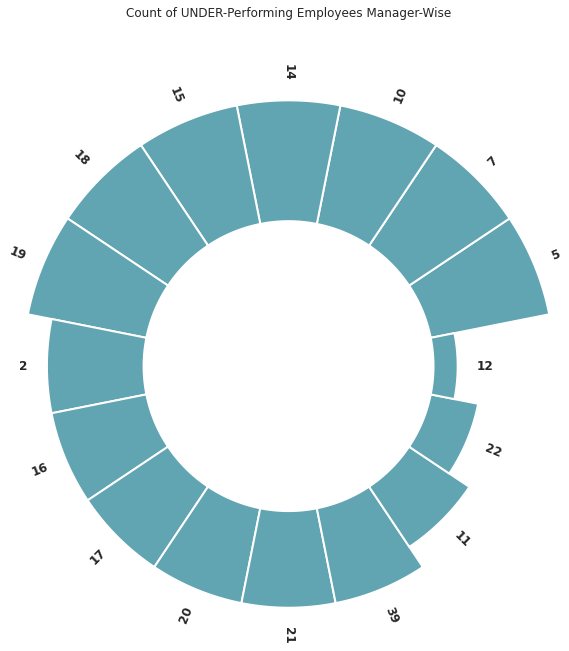

In [64]:
# Reorder the dataframe
b = b.sort_values(by=["Count of Employees"])

# initialize the figure
plt.figure(figsize=(20,10))
ax = plt.subplot(111, polar=True)
plt.axis('off')

# Constants = parameters controling the plot layout:
upperLimit = 100
lowerLimit = 30
labelPadding = 4

# Compute max and min in the dataset
max = b['Count of Employees'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * b["Count of Employees"] + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(b.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(b.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white",
    color="#61a4b2",
)

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, b["ManagerID"].astype("int")):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 

ax.set_title("Count of UNDER-Performing Employees Manager-Wise",pad=50)

Text(0.5, 1.05, 'Count of OVER-Performing Employees Manager-Wise')

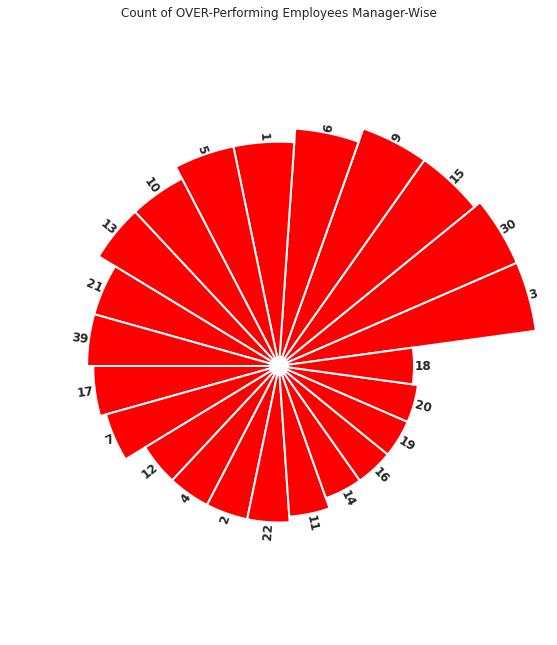

In [65]:
# Reorder the dataframe
g = g.sort_values(by=["Count of Employees"])

# initialize the figure
plt.figure(figsize=(20,10))
ax = plt.subplot(111, polar=True)
plt.axis('off')

# Constants = parameters controling the plot layout:
upperLimit = 100
lowerLimit = 30
labelPadding = 4

# Compute max and min in the dataset
max = g['Count of Employees'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * g["Count of Employees"] + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(g.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(g.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=np.power(heights,2), 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white",
    color="#ff0000",
)

# Add labels
for bar, angle, height, label in zip(bars,angles, np.power(heights,2), g["ManagerID"].astype("int")):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 

ax.set_title("Count of OVER-Performing Employees Manager-Wise",pad=50)

Kesimpulan:
Manajer dengan ID=18 memiliki lot karyawan terbaik, karena lebih sedikit karyawan yang berkinerja buruk dan lebih banyak karyawan yang berkinerja berlebihan.

b. Gender Wise Split:

In [66]:
h=pd.DataFrame(df2.groupby(["Sex","PS"])["EmpID"].count()).reset_index()
h

,Sex,PS,EmpID
0,F,1,5
1,F,2,9
2,F,3,142
3,F,4,20
4,M,1,8
5,M,2,9
6,M,3,101
7,M,4,17


In [67]:
fig=px.bar(h, x='PS', y='EmpID', color='Sex', title='Performance Score Gender-Wise',text="EmpID",
      labels={'PS': 'Performance Score', 'EmpID': 'Count of Employees'},
      barmode="group")
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
# Set fontsize and uniformtext_mode='hide' says to hide the text if it won't fit
fig.update_layout(uniformtext_minsize=10)
fig

Sekali lagi telah dibuktikan bahwa Wanita lebih efisien dibandingkan dengan Pria.

10. Tanggal pemutusan berhubungan dengan manajer?

In [68]:
df2["DateofHire"]

0       7/5/2011
1      3/30/2015
2       7/5/2011
3       1/7/2008
4      7/11/2011
         ...    
306     7/7/2014
307     9/2/2008
308    4/10/2010
309    3/30/2015
310    9/29/2014
Name: DateofHire, Length: 311, dtype: object

In [69]:
df2["DateofTermination"]

0            NaN
1      6/16/2016
2      9/24/2012
3            NaN
4       9/6/2016
         ...    
306          NaN
307    9/29/2015
308          NaN
309          NaN
310          NaN
Name: DateofTermination, Length: 311, dtype: object

In [70]:
df2["TermReason"] #Describes the reason for leaving the job

0      N/A-StillEmployed
1          career change
2                  hours
3      N/A-StillEmployed
4       return to school
             ...        
306    N/A-StillEmployed
307     Another position
308    N/A-StillEmployed
309    N/A-StillEmployed
310    N/A-StillEmployed
Name: TermReason, Length: 311, dtype: object

In [71]:
v=df2[["EmpID","DateofHire","DateofTermination","TermReason"]].copy()
v.dropna(inplace=True) #Removing those employees who are still working in the company
v.head()

,EmpID,DateofHire,DateofTermination,TermReason
1,10084,3/30/2015,6/16/2016,career change
2,10196,7/5/2011,9/24/2012,hours
4,10069,7/11/2011,9/6/2016,return to school
10,10252,1/10/2011,1/12/2017,Another position
11,10242,4/2/2012,9/19/2016,unhappy


In [72]:
v.shape  #Looks like 311-104=207 employees have been retained by the company

(104, 4)

In [73]:
v.TermReason.nunique(),v.TermReason.unique() #One of the employees' was a Gangster lol.

(17, array(['career change', 'hours', 'return to school', 'Another position',
        'unhappy', 'attendance', 'performance',
        'Learned that he is a gangster', 'retiring',
        'relocation out of area', 'more money', 'military',
        'no-call, no-show', 'Fatal attraction',
        'maternity leave - did not return', 'medical issues',
        'gross misconduct'], dtype=object))

In [74]:
v1=pd.DataFrame(v.groupby("TermReason")["EmpID"].count()).reset_index()
v1

,TermReason,EmpID
0,Another position,20
1,Fatal attraction,1
2,Learned that he is a gangster,1
3,attendance,7
4,career change,9
5,gross misconduct,1
6,hours,8
7,maternity leave - did not return,3
8,medical issues,3
9,military,4


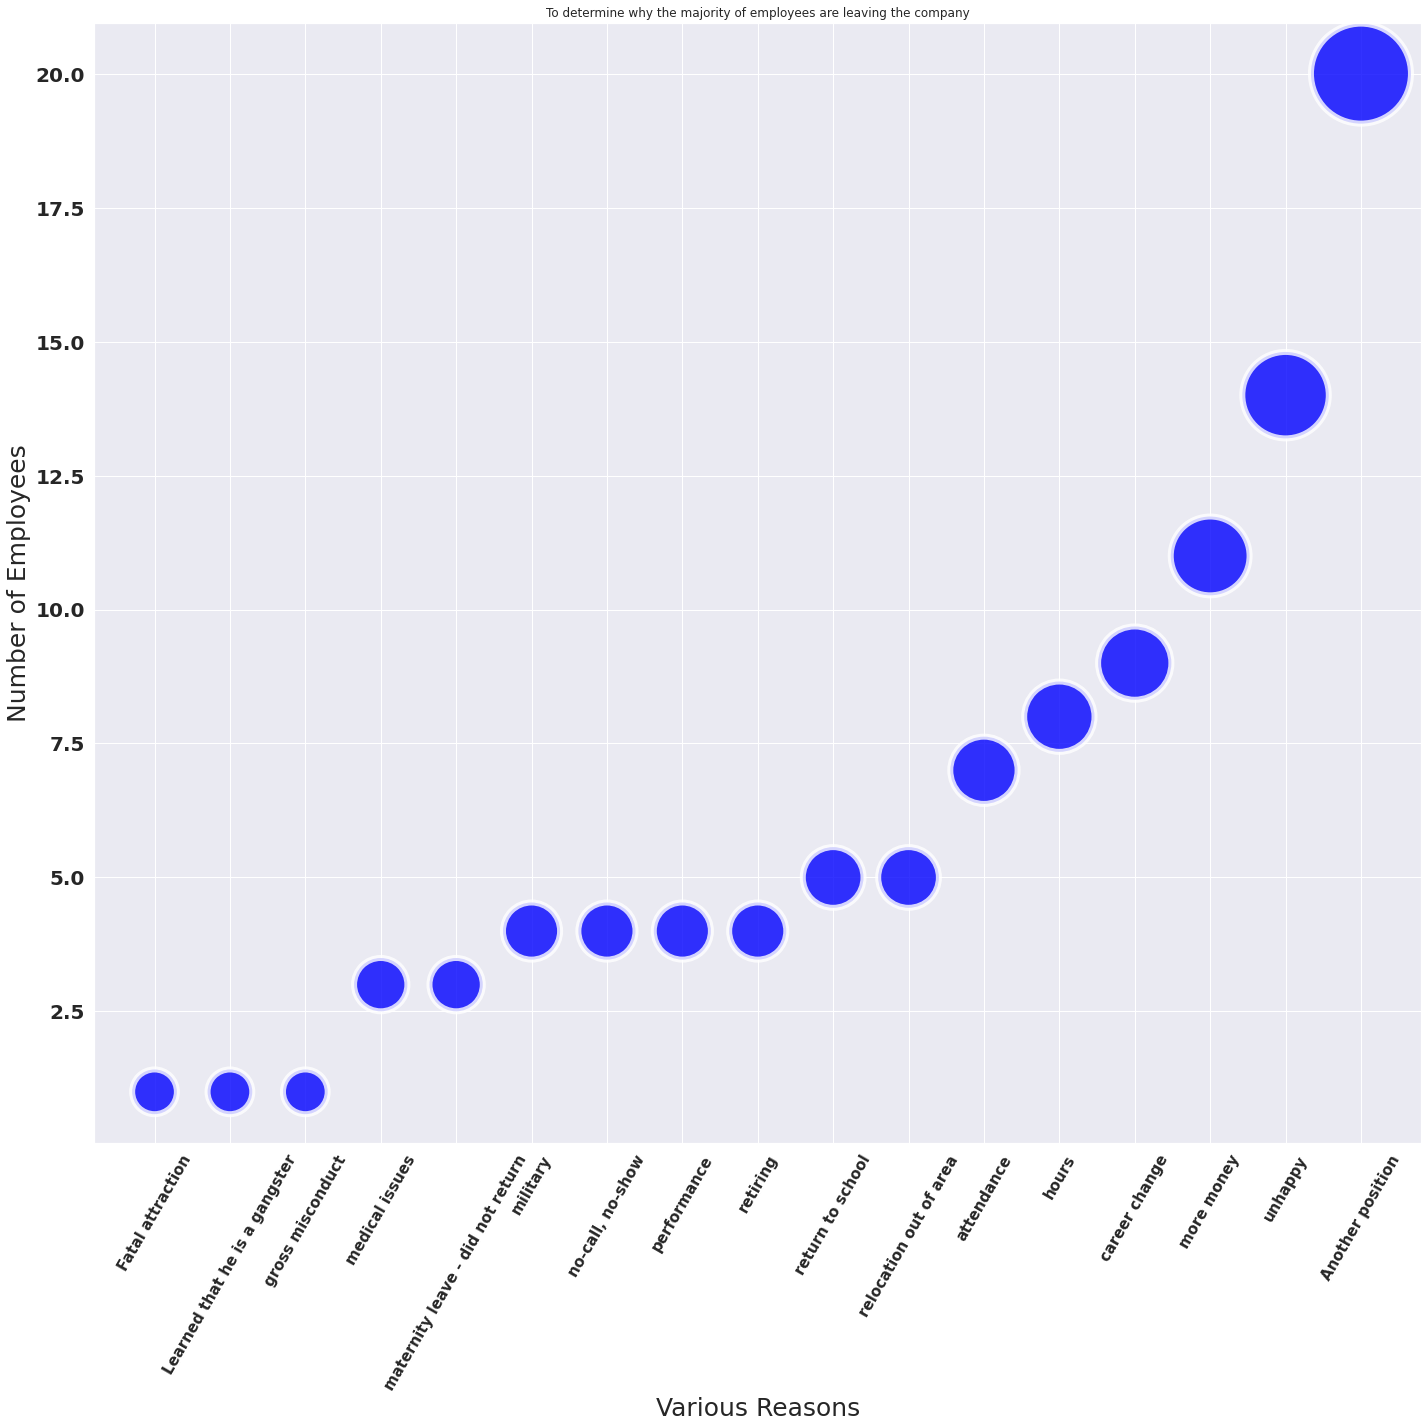

In [75]:
plt.figure(figsize=(20,20))
sns.set_theme()
sns.scatterplot(data=v1.sort_values(by=["EmpID"]), x="TermReason", y="EmpID", size="EmpID",color="blue", legend=False, sizes=(2000, 10000), alpha=0.8, linewidth=6)
plt.xlabel("Various Reasons",size=25)
plt.ylabel("Number of Employees",size=25)
plt.title("To determine why the majority of employees are leaving the company", loc="center")
plt.yticks(fontsize=20) 
plt.xticks(fontsize=15,rotation=60) 
# show the graph
plt.tight_layout()

Tiga alasan utama Karyawan keluar dari perusahaan adalah:

1. Posisi yang lebih baik di perusahaan lain yang mengarah ke peningkatan karier. (~20%)

2. Kurangnya Kepuasan Kerja (ketidakbahagiaan)

3. Gaji yang lebih baik ditawarkan oleh perusahaan saingan.

11. Karyawan keluar dari dept tertentu?

In [76]:
w=df2[["EmpID","DateofHire","DateofTermination","Department"]].copy()
w.dropna(inplace=True) #Removing those employees who are still working in the company
w.head()

,EmpID,DateofHire,DateofTermination,Department
1,10084,3/30/2015,6/16/2016,IT/IS
2,10196,7/5/2011,9/24/2012,Production
4,10069,7/11/2011,9/6/2016,Production
10,10252,1/10/2011,1/12/2017,Production
11,10242,4/2/2012,9/19/2016,Production


In [77]:
w1=pd.DataFrame(w.groupby("Department")["EmpID"].count()).reset_index()
w1

,Department,EmpID
0,Admin Offices,2
1,IT/IS,10
2,Production,83
3,Sales,5
4,Software Engineering,4


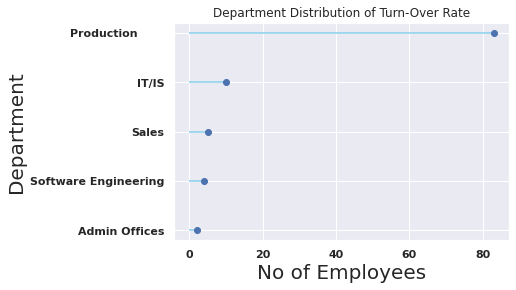

In [78]:
# Reorder it based on the values
ordered_df = w1.sort_values(by='EmpID')
my_range=range(1,len(w1.index)+1)
 
# The horizontal plot is made using the hline function
plt.hlines(y=my_range, xmin=0, xmax=ordered_df['EmpID'], color='skyblue')
plt.plot(ordered_df['EmpID'], my_range, "o")
 
# Add titles and axis names
plt.yticks(my_range, ordered_df['Department'])
plt.title("Department Distribution of Turn-Over Rate", loc='center')
plt.xlabel('No of Employees',size=20)
plt.ylabel('Department',size=20)

# Show the plot
plt.show()

Sepertinya Departemen Produksi telah kehilangan banyak karyawan sejak awal.

12. Karyawan yang bergabung dengan perusahaan per tahun.

In [79]:
n=df2[["EmpID","DateofHire","Sex"]].copy()
n["DateofHire"]=pd.to_datetime(n["DateofHire"])
n["Group"]=n["DateofHire"].apply(lambda x:int(x.year))

In [80]:
n=pd.DataFrame(n.groupby("Group")["EmpID"].count())
n

,EmpID
Group,
2006,1
2007,2
2008,3
2009,7
2010,9
2011,83
2012,45
2013,44
2014,60


In [81]:
fig = px.bar(n, x=n.index, y='EmpID',color='EmpID',
             labels={'EmpID':'Count of Employees',"Group":"Year of Hiring"}, height=400)
fig.update_layout(
    font_family="Stencil",
    font_color="black",
    title_font_family="Times New Roman",
    title_font_color="red",
    legend_title_font_color="green"
)
fig.update_xaxes(title_font_family="Arial",
                 title_font_color="Green")
fig.update_yaxes(title_font_family="Arial",
                 title_font_color="Green")
fig.update_layout(
    title={
        'text': "Bar Chart",
        'y':0.9,
        'x':0.42,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

Tahun 2011 merupakan Tahun Emas, dengan sebagian besar perekrutan dilakukan.(83 Karyawan dipekerjakan)

In [82]:
n=n.reset_index()

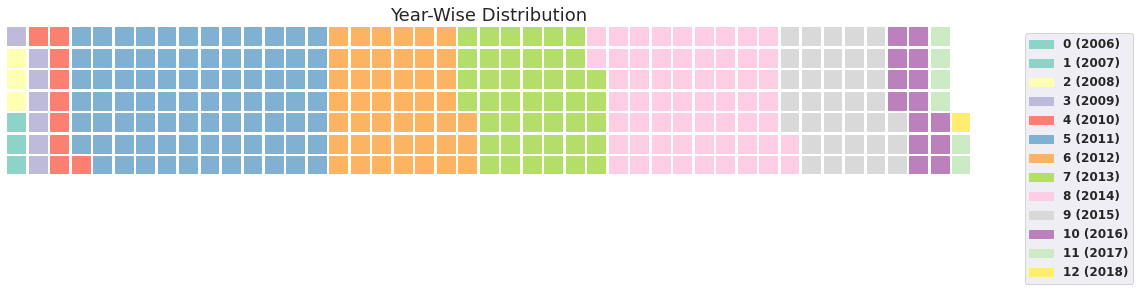

In [84]:
n_categories = n.shape[0]
#colors = [plt.cm.inferno_r(i/float(n_categories)) for i in range(n_categories)]
colors = [plt.cm.Set3(i/float(n_categories)) for i in range(n_categories)]

fig = plt.figure(
    FigureClass=Waffle,
    plots={
        '111': {
            'values': n["EmpID"],
            'labels': ["{0} ({1})".format(df2[0], df2[1]) for df2 in n[['Group', 'EmpID']].itertuples()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12},
            'title': {'label': 'Year-Wise Distribution', 'loc': 'center', 'fontsize':18}
        },
    },
    rows=7,
    colors=colors,
    figsize=(16, 9)
)

Melalui visual Waffle ini, saya mencoba menunjukkan bahwa tahun 2011 merupakan tahun dengan jumlah rekrutmen terbanyak.

Looking for some correlations among the numerical columns:

In [85]:
corr_m=df2.drop([i for i in ncol if "ID" in i],axis=1).corr()

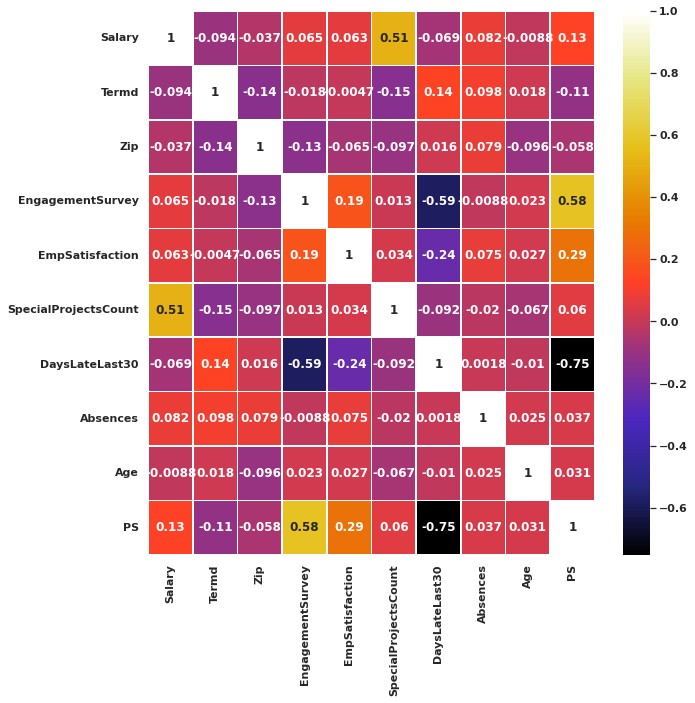

In [86]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_m,annot=True,linewidths=.5,cmap="CMRmap")

Looks like there is only one Significant correlation which we can check, i.e. the one between Salary and SpecialProjectsCount.

Text(0, 0.5, 'Salary')

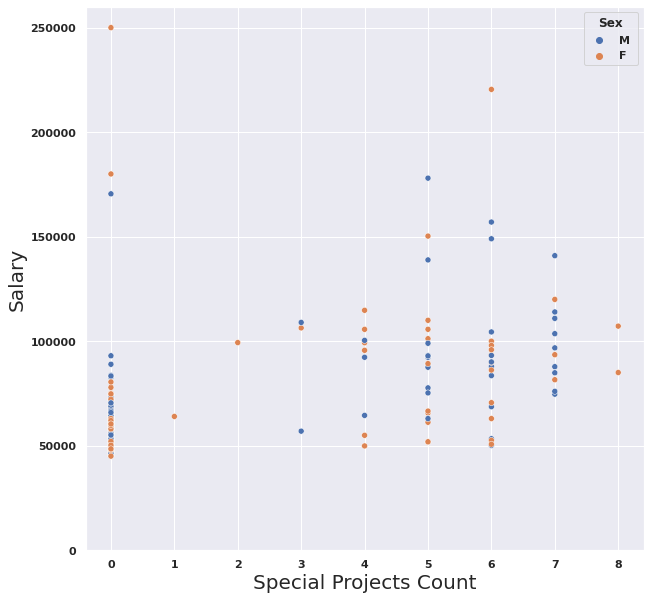

In [87]:
plt.figure(figsize=(10,10))
sns.set_style("darkgrid")
sns.scatterplot(x=df2["SpecialProjectsCount"],y=df2["Salary"],hue=df2["Sex"])
plt.ylim([0,2.6e5])
plt.xlabel("Special Projects Count",size=20)
plt.ylabel("Salary",size=20)

Tidak banyak tren yang bisa diamati. 